<a href="https://colab.research.google.com/github/LauraMorlok/Machine-Learning-Project/blob/main/MachineLearningProjekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Projekt - binäres Klassifikationsproblem

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from warnings import filterwarnings
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

filterwarnings(action='ignore', category=DeprecationWarning, message='`np.int` is a deprecated alias for the builtin `int`.')

### **1. Datensatz einlesen und aufbereiten**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive') #Zugriff auf Google Drive 
df = pd.read_csv("/content/drive/MyDrive/EmployeeAttrition.csv") #Datensatz einlesen 
df.head() #Ausgabe des oberen Teils des Datensatzes


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
check_for_nan = df.isnull().values.any() #Daten auf NaN-Werte untersuchen. Wenn die Ausgabe False ist, sind keine NaN-Werte vorhanden
print (check_for_nan) 

df.dtypes #Datentypen 

False


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
#Numerische Bezeichnungen von Attributen die nicht numerisch sind mit Begrifflichkeiten austauschen
df.Education.replace({1 : "Below College",
                       2 : "College",
                       3 : "Bachelor", 
                       4 : "Master", 
                       5 : "Doctor"}, inplace = True)

attributes = ["JobInvolvement","EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "RelationshipSatisfaction", "WorkLifeBalance", "JobSatisfaction", "PerformanceRating"]

for name in attributes:
    df[name].replace({1 : "Low",
                      2 : "Medium",
                      3 : "High",
                      4 : "Very High",
                      5 : "Very Very High"}, inplace = True)

### **2. Datenexploration**

In [ ]:
#Statistische Auswertung der numerischen Daten
df.describe()  

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Statistische Auswertung der kategorialen Daten 
objects=df.select_dtypes(include=object).columns.tolist()
objects_df=pd.DataFrame(df[objects].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(objects_df)

count
column                   value                   
Attrition                Yes                  237
                         No                  1233
BusinessTravel           Non-Travel           150
                         Travel_Frequently    277
                         Travel_Rarely       1043
...                                           ...
RelationshipSatisfaction High                 459
WorkLifeBalance          Low                   80
                         Very High            153
                         Medium               344
                         High                 893

[63 rows x 1 columns]

In [ ]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "bar"},{"type": "pie"},{"type": "bar"} ]], subplot_titles=['Angestellte und abgewanderte Mitarbeitende', 'Abgewanderte Mitarbeitende nach Bereich','Geschlechterverteilung'])
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'lightgreen']

#Geschlechterverteilung
gender = ['Männlich', 'Weiblich']
number = [882, 588]

fig.add_trace(go.Bar(x=gender,
                y=number,
                text=number,
                opacity=.8,
                textfont_size=15,
                marker_color=['lightblue', 'gold'],
                showlegend=False,
                name="Grafik 1",
                hovertemplate = "%{label}: <br>%{y}"),
                row=1, col=3)
fig.update_traces(marker_line=dict(width=1, color='#1F0202'))


#Mitarbeiterabwanderung
attrition_percentage=df['Attrition'].value_counts(normalize=True)
attrition_percentage=attrition_percentage.mul(100).rename('Percent').reset_index()
attrition_percentage.rename(columns={'index':'Attrition'}, inplace=True)
attrition_percentage['Attrition']=['Abgewanderte Mitarbeitende' if i == 'Yes' else 'Angestellte Mitarbeitende' for i in attrition_percentage['Attrition']]
x=attrition_percentage['Attrition']
y=attrition_percentage['Percent'].round(1)
fig.add_trace(go.Bar(
            x=x,
            y=y,
            text=y,
            opacity=.8,
            textfont_size=15,
            marker_color=['lightblue','gold'],
            showlegend=False,
            name="Grafik 2",
            hovertemplate = "%{label}: <br>%{y}"),
            row=1, col=1)
fig.update_traces(marker_line=dict(width=1, color='#1F0202'))
fig.update_layout(yaxis_ticksuffix = '%')

#Mitarbeiterabwanderung nach Bereichen 
attrition_department = df[df.Attrition=='Yes']
attrition_department=df['Department'].value_counts(normalize=True)
attrition_department=attrition_department.mul(100).rename('Percent').reset_index()
attrition_department.rename(columns={'index':'Department'}, inplace=True)
fig.add_trace(go.Pie
              (labels=attrition_department['Department'], 
              values=attrition_department['Percent'],
              opacity=.8,
              textfont_size=15,
              marker_colors=['lightgreen','mediumturquoise','darkorange'],
              name="Grafik 3",
              hovertemplate = "%{label}: <br>%{percent} Abwanderung"),
              row=1, col=2)
fig.update_traces(marker_line=dict(width=1, color='#1F0202'))



Da 83.9% der in dem Datensatz eingetragenen Mitarbeitenden noch in dem Unternehmen angestellt sind, muss das zu entwickelnde Modell eine bessere Erfolgsquote haben als 83.9%. Denn wenn vorhergesagt wird, dass alle Mitarbeitenden bleiben, dann würde das zu 83.9% zutreffen.

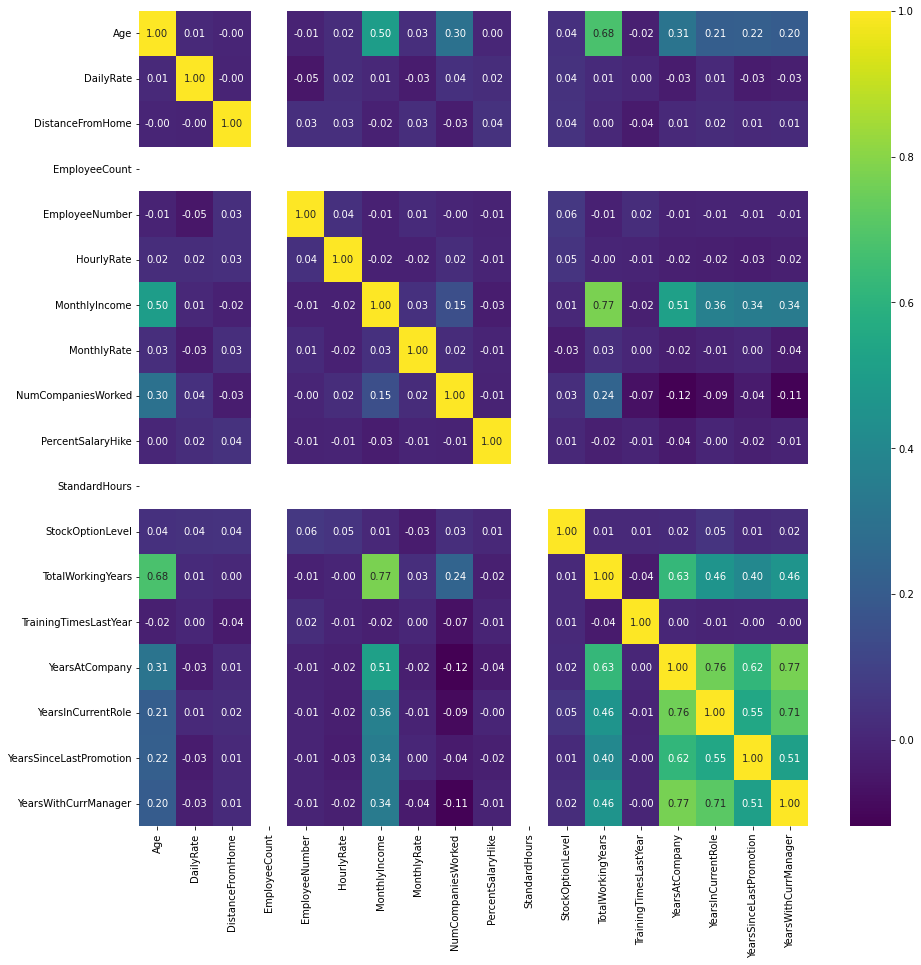

In [ ]:
plt.figure(figsize=(15, 15))
corr=df.corr().round(2)
sns.heatmap(df.corr(), annot=True, fmt='.2f',cmap='viridis')



Korrelationsmatrix: Angezeigt werden die numerischen Werte, die intervallskaliert (gleiche Abstände) oder metrisch (natürliche Reihenfolge) skaliert sind.

### **3. Pre Processing (Featur Selection und Feature Engineering)**

In [ ]:
df = df.drop(columns=['Over18','StandardHours','EmployeeCount', 'EmployeeNumber']) #Irrelevante Spalten löschen 

**Chi-Square-Test** 

Voraussetzung: Variablen sind nominal oder ordinal skaliert und die Stichprobengröße ist größer 50 sowie zufällig gezogen. 

**Nullhypothese:** Die unabhängige Variable hat keinen Einfluss auf die abhängige Variable.

**Gegenhypothese:** Die unabhängige Variable hat einen Einfluss auf die abhängige Variable.

Ist der p-Wert > 0.5, so wird die Nullhypothese bestätigt. Ist p < 0.5, so wird die Gegenhypothese bestätigt. 


**Zu betrachtende kategoriale Variablen:** BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, OverTime, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance

In [ ]:
#dataframe mit den kategorialen Variablen erstellen

observed_categorial_names = df.select_dtypes(include=object).columns.tolist() #Namen der kategorialen Variablen
observed_categorial_names_without_Attrition = observed_categorial_names.remove('Attrition') 
#print(observed_categorial_names) #Output = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'] (=15 kategoriale Variablen)

chi_statistic=[]
p_value =[]

for i in df[observed_categorial_names]: 
   observed=pd.crosstab(index=df["Attrition"], columns=df[i])
   chi2, p, dof, expected =scipy.stats.chi2_contingency(observed, correction=False) #Yates Korrekur nur bei kleinen Stichproben
   chi_statistic.append(chi2)
   p_value.append(p)
   if p > 0.05:
    print('Das Attribut {} hat keinen Einfluss auf die Abwanderung. Der p-Wert beträgt {:0.4f}.'.format(i,p))


Das Attribut Education hat keinen Einfluss auf die Abwanderung. Der p-Wert beträgt 0.5455.
Das Attribut Gender hat keinen Einfluss auf die Abwanderung. Der p-Wert beträgt 0.2588.
Das Attribut PerformanceRating hat keinen Einfluss auf die Abwanderung. Der p-Wert beträgt 0.9118.
Das Attribut RelationshipSatisfaction hat keinen Einfluss auf die Abwanderung. Der p-Wert beträgt 0.1550.


**Ergebnis des Unabhängigkeitstests:** 

*   **Zusammenhang:** BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, OverTime, WorkLifeBalance weisen einen Zusammenhang zur Abwanderung auf
*   **Kein Zusammenhang:** Education, Gender, PerformanceRating und RelationshipSatisfaction.


Die Attribute ohne Zusammenhang werden für das Training der Algorithmen nicht berücksichtigt.

In [ ]:
#Entfernen der vier identifizierten Variablen mit p>0.05
df = df.drop(columns=['Education','Gender','PerformanceRating','RelationshipSatisfaction'])

**Label Encoding sowie One Hot Encoding**

Um ein Klassifikationsmodell trainieren zu können, müssen nun auch kategorialen Variablen in numerische Form gebracht werden. Dies geschieht, in dem man die Ausprägungen der Variablen mit 0 und 1 kennzeichnet. 0 steht für nicht zutreffend und 1 für zutreffend.

In [ ]:
#LabelEncoding für Attrition. "Yes" und "No" werden zu 1 und 0
lbl = LabelEncoder()
lbl.fit(['Yes','No'])
df["Attrition"] = lbl.transform(df["Attrition"])
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Life Sciences,Medium,94,High,...,Yes,11,0,8,0,Low,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Life Sciences,High,61,Medium,...,No,23,1,10,3,High,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Other,Very High,92,Medium,...,Yes,15,0,7,3,High,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Life Sciences,Very High,56,High,...,Yes,11,0,8,3,High,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Medical,Low,40,High,...,No,12,1,6,3,High,2,2,2,2


In [ ]:
#alle kategorialen Variablen in numerische Variablen umwandeln mit One Hot Encoding
df= pd.get_dummies(df)
df.head()

#df.columns

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,WorkLifeBalance_High,WorkLifeBalance_Low,WorkLifeBalance_Medium,WorkLifeBalance_Very High
0,41,1,1102,1,94,5993,19479,8,11,0,...,1,0,0,1,0,1,0,1,0,0
1,49,0,279,8,61,5130,24907,1,23,1,...,0,0,1,0,1,0,1,0,0,0
2,37,1,1373,2,92,2090,2396,6,15,0,...,0,0,0,1,0,1,1,0,0,0
3,33,0,1392,3,56,2909,23159,1,11,0,...,0,0,1,0,0,1,1,0,0,0
4,27,0,591,2,40,3468,16632,9,12,1,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
#MinMaxScaler() #Attributwerte werden auf eine Skale von 0 und 1 neu skaliert. Ausgenommen sind die OneHotEncoded Attribute 
scaler = MinMaxScaler()

df[['DailyRate','DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate','NumCompaniesWorked', 
                     'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']] = scaler.fit_transform(df[['DailyRate','DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate','NumCompaniesWorked', 
                     'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']])

### **4. Modell trainieren**

Aus der Zielsetzung heraus findet eine binäre Klassifikation Anwendung. Die Klassifikation gehört neben der Regression zum überwachten Lernen und lässt sich als Zuordnung oder Gruppierung von Beobachtungen in vordefinierte Kategorien beschreiben. Diese Kategorien sind im vorliegenden Fall der Unternehmensaustritt oder kein Unternehmensaustritt. Diese Kategorien werden nachfolgend als Klassen bezeichnet. 

**1. Algorithmus: K-Nearest-Neigbor**

Train Feature Size :  1029
Test Feature Size : 441
 

Die Anzahl der Nachbarn mit der höchsten Accuracy mit 0.8481 ist: 4.



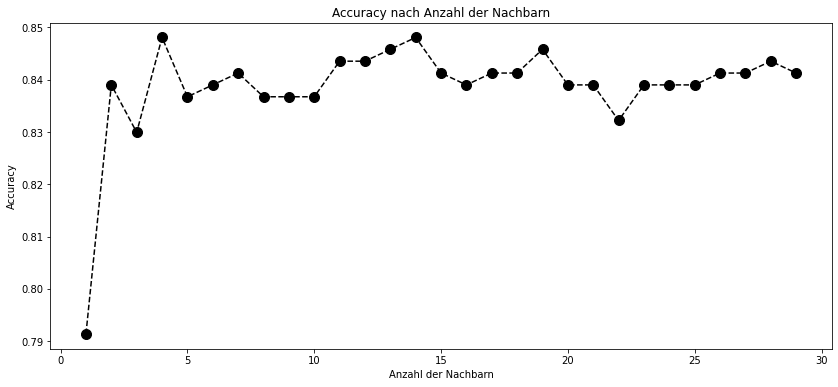

In [ ]:
#Train-und Testset 
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y) #Das Attribut stratify sorgt dafür, dass Klasse 0 und Klasse 1 jeweils zu 70% im Trainingsdatensatz und zu 30% im Testdatensatz vorkommen

print("Train Feature Size : ",len(X_train))
print('{}{}\n '.format('Test Feature Size : ',len(X_test)))


#Balance der Werte in dem Test-und Trainingssatz überprüfen
#print(y_test.mean()) #0.16099773242630386
#print(y_train.mean()) #0.16132167152575316

#Anzahl an Nachbarn (k) finden, für die der Algorithmus die höchste Accuracy aufweist
accuracy_values = []

#Accuracy für k = 1 bis 30 ausrechnen
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_values.append(accuracy_score(y_pred_knn,y_test))

#print(accuracy_values)
np.max(accuracy_values) #Höchste Accuracy finden 
pos_max = accuracy_values.index(np.max(accuracy_values)) #Index finden (+1) == gesuchtes k 
best_k_accuracy = pos_max +1

print('\n{} {} {} {}{}'.format('Die Anzahl der Nachbarn mit der höchsten Accuracy mit', round(np.max(accuracy_values),4), 'ist:', best_k_accuracy, '.'))

#Plot, welcher die Accuracy für k = 1 bis 30 darstellt  
plt.figure(figsize=(14, 6))
plt.plot(range(1, 30), accuracy_values, color= 'black', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Accuracy nach Anzahl der Nachbarn')
plt.xlabel('Anzahl der Nachbarn')
plt.ylabel('Accuracy')
print()

In [ ]:
#Untersuchung des Modells mit k = 4
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

#Konfusionsmatrix mit TP, FN, FP, TN
print('{}\n'.format(confusion_matrix(y_test, y_pred_knn)))

TP, FN, FP, TN = confusion_matrix(y_test, y_pred_knn).ravel()

print('True Positive(TP)  = ', TP)
print('False Negative(FN) = ', FN)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)

print('\n{}\n'.format('True Positives stehen für die Mitarbeitenden, die das Unternehmen nicht verlassen.'))

#Klassifikationsreport
print('\n{}'.format(classification_report(y_test, y_pred_knn)))

mcc = round(matthews_corrcoef(y_test, y_pred_knn),4)
print('\n{}{}{}'.format('Auch der Matthews Korrelationskoeffizient deutet auf Ergebnis nahe dem Zufall hin: ', mcc, '.'))


[[365   5]
 [ 62   9]]

True Positive(TP)  =  365
False Negative(FN) =  5
False Positive(FP) =  62
True Negative(TN)  =  9

True Positives stehen für die Mitarbeitenden, die das Unternehmen nicht verlassen.


              precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.64      0.13      0.21        71

    accuracy                           0.85       441
   macro avg       0.75      0.56      0.56       441
weighted avg       0.82      0.85      0.80       441


Auch der Matthews Korrelationskoeffizient deutet auf Ergebnis nahe dem Zufall hin: 0.2374.



Die Anzahl der Nachbarn mit dem höchsten F1-Wert mit 0.8078 ist: 3.



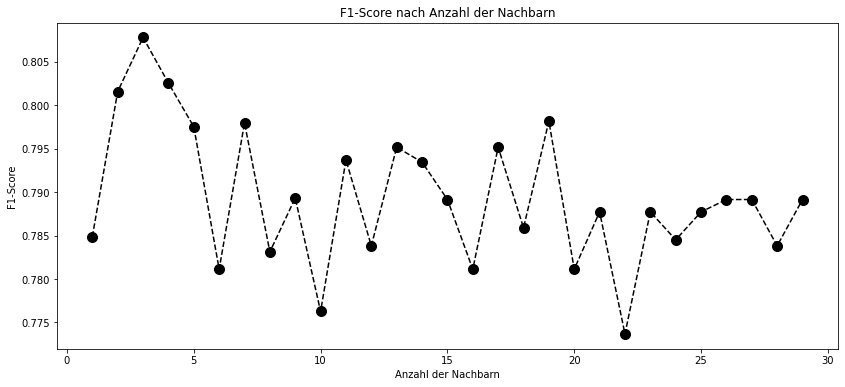

In [ ]:
#Anzahl an Nachbarn (k) finden, für die der Algorithmus den höchsten F1-Wert aufweist
f1_values = []

#F1 Score für k = 1 bis 30 ausrechnen
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    f1_values.append(f1_score(y_test, y_pred_knn, average ='weighted'))

np.max(f1_values) #Höchsten F1 Score finden
pos_max = f1_values.index(np.max(f1_values))
best_k_f1 = pos_max +1

print('\n{} {} {} {}{}'.format('Die Anzahl der Nachbarn mit dem höchsten F1-Wert mit', round(np.max(f1_values),4), 'ist:', best_k_f1, '.'))

#Plot, welcher der F1 Score für k = 1 bis 30 darstellt  
plt.figure(figsize=(14, 6))
plt.plot(range(1, 30), f1_values, color= 'black', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('F1-Score nach Anzahl der Nachbarn')
plt.xlabel('Anzahl der Nachbarn')
plt.ylabel('F1-Score')
print()


**Matthews Correlation Coefficient (MCC)** als Metrik, da sich dieser für unaugeglichene Daten gut eignet. 
MCC gibt die Korrelation zwischen wahren und vorhergesagten Werten an: 
- -1 gibt die totale Diskrepanz zwischen vorhergesagten und tatsächlichen Klassen an
- 0 ist gleichbedeutend mit dem Zufall
- 1 zeigt die totale Übereinstimmung zwischen vorhergesagten Klassen und tatsächlichen Klassen



Die Anzahl der Nachbarn mit dem höchsten MCC-Wert mit 0.2393 ist: 3.



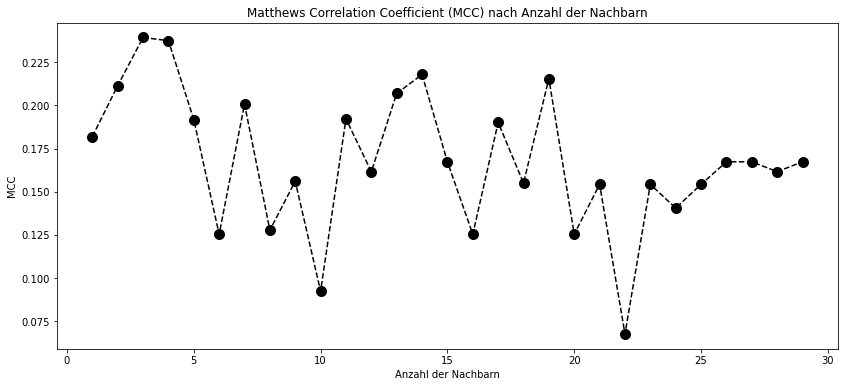

In [ ]:
#Anzahl an Nachbarn (k) finden, für die der Algorithmus den höchsten MCC aufweist
mcc_values = []

#MCC für k = 1 bis 30 ausrechnen
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mcc_values.append(matthews_corrcoef(y_test, pred_i))

np.max(mcc_values) #Höchsten MCC finden
pos_max = mcc_values.index(np.max(mcc_values))
best_k_mcc = pos_max +1

#Plot, welcher die MCC-Werte für k = 1 bis 30 darstellt  
plt.figure(figsize=(14, 6))
plt.plot(range(1, 30), mcc_values, color= 'black', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Matthews Correlation Coefficient (MCC) nach Anzahl der Nachbarn')
plt.xlabel('Anzahl der Nachbarn')
plt.ylabel('MCC')
print()


print('\n{} {} {} {}{}\n'.format('Die Anzahl der Nachbarn mit dem höchsten MCC-Wert mit',round(np.max(mcc_values),4), 'ist:', best_k_mcc, '.'))

In [ ]:
#Untersuchung des Modells mit k = 3
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_knn))

[[349  21]
 [ 54  17]]


### **Gesamtbetrachtung**

Es kann festgehalten werden, dass der **Algorithmus mit drei Nachbarn** in zwei der insgesamt drei getesteten Metriken **am besten** abschneidet. Diese sind der F1-Score und der MCC-Wert. Das Modell mit vier festgelegten Nachbarn konnte die beste Accuracy erlangen. Bei  vier Nachbarn gitb es insgesamt 67 Falschklassifizierungen, bei drei Nachbarn 75. 

Der Klasse 0 (Attrition = No) gehören 370 Objekte an, der Klasse 1 (Attrition = Yes) 71. Dies ist an dem Support-Wert in dem Klassifikationsreport erkennbar. Da die Evaluationsmetrik Accuracy bei **nicht ausgeglichenen Datensätzen** nicht aussagekräftig ist, da das Modell oftmals alle Objekte der Klasse zuweist, die am häufigsten vorkommt, und dies auch in den trainierten Modellen der Fall war, wurden weitere Erfolgsmetriken (F1-Score sowie MCC) hinzugezogen. Die Erfolgsquote war bei diesen Metriken bei k = 3 am höchsten, obwohl insgesamt drei Objekte mehr falsch klassifiziert wurden. 

Um bessere Ergebnisse mit dem KNN-Algorithmus zu erhalten, muss die **Gleichverteilung der Klassen** in dem Datensatz verbessert werden.
Um den unausgeglichenen Daten entgegenzuwirken, kann entweder Under- oder Oversampling Anwendung finden. In diesem Fall wird aufgrund der Größe des Datensatzes **Oversampling** angewandt.

Resampled dataset shape: Counter({0: 863, 1: 863})

Die Anzahl der Nachbarn mit der höchsten Accuracy mit 0.7574 ist: 2.



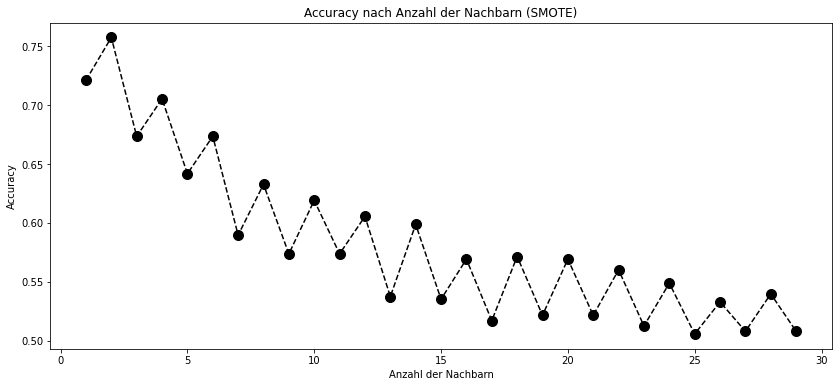

In [ ]:
#Synthetic Minority Oversampling Technique or SMOTE 
sm = SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)

print('Resampled dataset shape:', Counter(y_train_smote))

accuracy_values_sm = []

#Accuracy für k = 1 bis 30 ausrechnen
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_smote, y_train_smote)
    y_pred_smote_knn = knn.predict(X_test)
    accuracy_values_sm.append(accuracy_score(y_pred_smote_knn,y_test))

#print(accuracy_values)
np.max(accuracy_values_sm) #Höchste Accuracy finden 
pos_max = accuracy_values_sm.index(np.max(accuracy_values_sm)) #Index finden (+1) == gesuchtes k 
best_k_accuracy_sm = pos_max +1

print('\n{} {} {} {}{}'.format('Die Anzahl der Nachbarn mit der höchsten Accuracy mit', round(np.max(accuracy_values_sm),4), 'ist:', best_k_accuracy_sm, '.'))

#Plot, welcher die Accuracy für k = 1 bis 30 darstellt  
plt.figure(figsize=(14, 6))
plt.plot(range(1, 30), accuracy_values_sm, color= 'black', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Accuracy nach Anzahl der Nachbarn (SMOTE)')
plt.xlabel('Anzahl der Nachbarn')
plt.ylabel('Accuracy')
print()

In [ ]:
#Balance der Werte in dem Trainingssatz überprüfen
#print(y_train_smote.mean()) #0.5

#Konfusionsmatrix für den SMOTE Datensatz und k = 2
print(confusion_matrix(y_test, y_pred_smote_knn))

TP, FN, FP, TN = confusion_matrix(y_test, y_pred_smote_knn).ravel()

print('\n{}{}'.format('True Positive(TP)  = ', TP))
print('False Negative(FN) = ', FN)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)

#Klassifikationsreport für den SMOTE Datensatz und k = 2
print('\n{}'.format(classification_report(y_test, y_pred_smote_knn)))

mcc = round(matthews_corrcoef(y_test, y_pred_smote_knn),4)
print('\n{}{}{}'.format('Matthews Korrelationskoeffizient: ', mcc, '.'))

[[163 207]
 [ 10  61]]

True Positive(TP)  = 163
False Negative(FN) =  207
False Positive(FP) =  10
True Negative(TN)  =  61

              precision    recall  f1-score   support

           0       0.94      0.44      0.60       370
           1       0.23      0.86      0.36        71

    accuracy                           0.51       441
   macro avg       0.58      0.65      0.48       441
weighted avg       0.83      0.51      0.56       441


Matthews Korrelationskoeffizient: 0.2256.


**2. Algorithmus: Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators = 100) #Standardhyperparameter
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

print('{}{}{}'.format('Die Accuracy des Random Forest Algorithmus beträgt: ', round(accuracy_score(y_test, y_pred_rf),4),'.'))

#print(confusion_matrix(y_test, y_pred_rf))
print('{}'.format(''))

TP, FN, FP, TN = confusion_matrix(y_test, y_pred_rf).ravel()

print('True Positive(TP)  = ', TP)
print('False Negative(FN) = ', FN)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)


print('\n{}'.format(classification_report(y_test, y_pred_rf)))


Die Accuracy des Random Forest Algorithmus beträgt: 0.8753.

True Positive(TP)  =  361
False Negative(FN) =  9
False Positive(FP) =  46
True Negative(TN)  =  25

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.74      0.35      0.48        71

    accuracy                           0.88       441
   macro avg       0.81      0.66      0.70       441
weighted avg       0.86      0.88      0.86       441



**Hyperparameter-Tuning Random Forest**

In [ ]:
#the number of trees in the forest (n_estimators)
#the number of features considered for splitting at each leaf node (max_features)
#max_depth = max number of levels in each decision tree
#min_samples_split = min number of data points placed in a node before the node is split
#min_samples_leaf = min number of data points allowed in a leaf node
#bootstrap = method for sampling data points (with or without replacement)

#Number of trees in random forest (n_estimators)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#Number of features to consider at every split (max_features)
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree (max_depth)
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Method of selecting samples for training each tree
bootstrap = [True, False]

#random_grid mit den Hyperparametern erstellen
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, n_jobs = -1, random_state = 2)
# n_iter = controls the number of different combinations to try
# cv= the number of folds to use for cross validation. Folds = In K-Fold CV, we further split our training set into K number of subsets
# More iterations will cover a wider search space and more cv folds reduces the chances of overfitting
# Fit the random search model
rf_random.fit(X_train_smote, y_train_smote)

# Die besten Werte aus dem random_grid ermittlen
print(rf_random.best_score_)
print(rf_random.best_params_)

#Output: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

Fitting 3 folds for each of 50 candidates, totalling 150 fits
0.9230032206119163
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [ ]:
#Weiteres Hyperparametertuning um die gefundenen Hyperparameterwerte =  param_grid basierend auf den besten Ergebnissen des random_grids
param_grid = {
    'bootstrap': [True],
    'max_features': ['sqrt'],
    'max_depth': [40, 50, 60],
    'min_samples_leaf': [1, 2 , 3],
    'min_samples_split': [2 ,3, 4],
    'n_estimators': [200, 400, 600, 800]
}

#Random Forest Classifier Modell initiieren 
rf = RandomForestClassifier()

#Grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_smote, y_train_smote)
grid_search.best_params_

best_grid = grid_search.best_estimator_
print(rf_random.best_score_) 

Fitting 2 folds for each of 108 candidates, totalling 216 fits
0.9230032206119163


Die Wichtigkeit von Merkmalen kann mit dem Algorithmus Random Forest ermittelt werden. Dies wird nachfolgend in einem Balkendiagramm visualisiert.

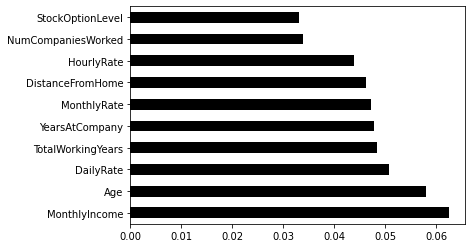

In [ ]:
#feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#print(X.columns)
#print(y_pred_rf)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(10)
feat_importances.plot(kind='barh', color = 'black')
plt.show()